In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
#1

In [6]:
df = pd.read_csv('11-1-Dataset-Predicting House Rent.csv')

In [7]:
print(df.head())

           city  area  rooms  bathroom  parking spaces floor     animal  \
0     São Paulo    70      2         1               1     7      acept   
1     São Paulo   320      4         4               0    20      acept   
2  Porto Alegre    80      1         1               1     6      acept   
3  Porto Alegre    51      2         1               0     2      acept   
4     São Paulo    25      1         1               0     1  not acept   

       furniture  hoa (R$)  rent amount (R$)  property tax (R$)  \
0      furnished      2065              3300                211   
1  not furnished      1200              4960               1750   
2  not furnished      1000              2800                  0   
3  not furnished       270              1112                 22   
4  not furnished         0               800                 25   

   fire insurance (R$)  total (R$)  
0                   42        5618  
1                   63        7973  
2                   41        3841 

In [8]:
print(df.shape)

(10692, 13)


In [9]:
print(df.describe())

               area         rooms      bathroom  parking spaces      hoa (R$)  \
count  10692.000000  10692.000000  10692.000000    10692.000000  1.069200e+04   
mean     149.217920      2.506079      2.236813        1.609147  1.174022e+03   
std      537.016942      1.171266      1.407198        1.589521  1.559231e+04   
min       11.000000      1.000000      1.000000        0.000000  0.000000e+00   
25%       56.000000      2.000000      1.000000        0.000000  1.700000e+02   
50%       90.000000      2.000000      2.000000        1.000000  5.600000e+02   
75%      182.000000      3.000000      3.000000        2.000000  1.237500e+03   
max    46335.000000     13.000000     10.000000       12.000000  1.117000e+06   

       rent amount (R$)  property tax (R$)  fire insurance (R$)    total (R$)  
count      10692.000000       10692.000000         10692.000000  1.069200e+04  
mean        3896.247194         366.704358            53.300879  5.490487e+03  
std         3408.545518       

In [10]:
#2

In [11]:
print(df.isnull().sum())

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64


In [12]:
df = df.drop(['bathroom', 'floor', 'animal', 'hoa (R$)', 'property tax (R$)', 'fire insurance (R$)'], axis=1)

In [13]:
print(df.head())

           city  area  rooms  parking spaces      furniture  rent amount (R$)  \
0     São Paulo    70      2               1      furnished              3300   
1     São Paulo   320      4               0  not furnished              4960   
2  Porto Alegre    80      1               1  not furnished              2800   
3  Porto Alegre    51      2               0  not furnished              1112   
4     São Paulo    25      1               0  not furnished               800   

   total (R$)  
0        5618  
1        7973  
2        3841  
3        1421  
4         836  


In [14]:
le = LabelEncoder()

In [15]:
n1 = ['city']
for i in n1:
    df[i] = le.fit_transform(df[i])
n1 = ['furniture']
for i in n1:
    df[i] = le.fit_transform(df[i])
print(df.head())

   city  area  rooms  parking spaces  furniture  rent amount (R$)  total (R$)
0     4    70      2               1          0              3300        5618
1     4   320      4               0          1              4960        7973
2     2    80      1               1          1              2800        3841
3     2    51      2               0          1              1112        1421
4     4    25      1               0          1               800         836


In [16]:
#3

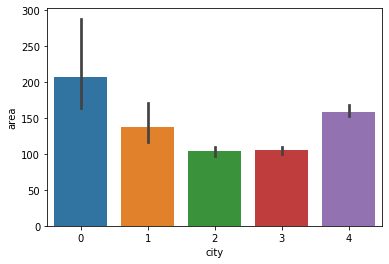

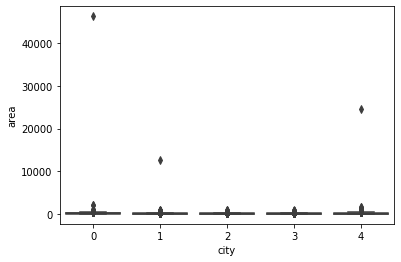

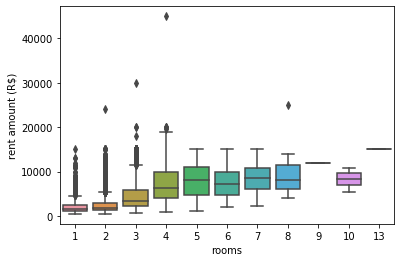

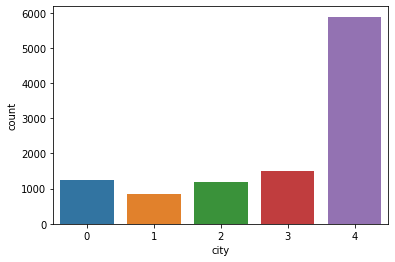

In [17]:
sns.barplot(x='city', y='area', data=df)
plt.show()
sns.boxplot(x='city', y='area', data=df)
plt.show()
sns.boxplot(x='rooms', y='rent amount (R$)', data=df)
plt.show()
sns.countplot(x='city', data=df)
plt.show()

In [18]:
#4

In [19]:
X = df.drop(["total (R$)", "furniture", "rent amount (R$)"], axis=1)
Y = df['total (R$)']
print(X.head())
print(Y.head())

   city  area  rooms  parking spaces
0     4    70      2               1
1     4   320      4               0
2     2    80      1               1
3     2    51      2               0
4     4    25      1               0
0    5618
1    7973
2    3841
3    1421
4     836
Name: total (R$), dtype: int64


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=112)
print(X_train)

       city  area  rooms  parking spaces
10247     3    75      2               0
10320     4   185      3               2
9715      3    56      2               0
6986      4    49      2               1
145       0    50      2               1
...     ...   ...    ...             ...
684       4   207      3               4
5317      4   220      4               3
2369      4    54      2               1
7642      4    53      2               1
232       4    40      1               0

[8553 rows x 4 columns]


In [21]:
#5_linear Regression

In [22]:
my_model = LinearRegression()

In [23]:
result = my_model.fit(X_train, Y_train)

In [24]:
predictions = result.predict(X_test)

In [25]:
print(predictions)

[4034.48911396 5799.06882605 8683.30864813 ... 2622.01213476 8833.72761048
 5731.44103604]


In [26]:
print('Accuracy of Linear regression := ', r2_score(Y_test, predictions))

Accuracy of Linear regression :=  0.10038595196670352


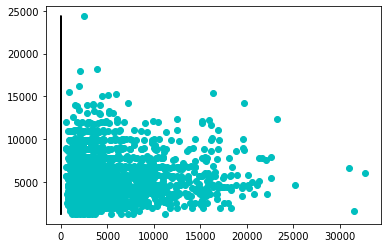

In [48]:
plt.scatter(Y_test, predictions, color='c')
plt.plot(X_test, predictions, color='k')
plt.show()

In [28]:
pred_new = result.predict([[4, 52, 2, 1]])
print(pred_new)

[4672.63886885]


In [61]:
#Logistic_Regression

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=156)

In [63]:
sc = StandardScaler()

In [64]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
my_model1 = LogisticRegression()

In [ ]:
result1 = my_model1.fit(X_train, Y_train)

In [ ]:
predictions1 = result1.predict(X_test)

In [ ]:
print(predictions1)
print("Accuracy of Logistic Regression:", accuracy_score(Y_test, predictions1))

In [ ]:
pred_new1 = result1.predict([[4, 52, 2, 1]])
print(pred_new1)

In [ ]:
print('By Obseving Accuracy of both model we conclude that Linear Model gives the maximum accuracy.'
      'So Linear model will be the best model for our Preticting House Rent Project')